In [3]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation

animation.writer = animation.writers['ffmpeg']

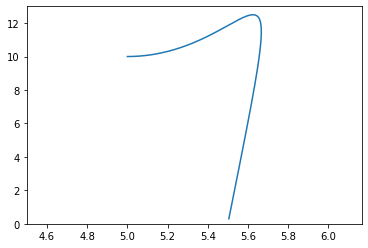

In [28]:
def lunar_lander(pos_init, v_init, alpha=1, beta=3, gamma=3, t_steps=200):
    x_init, y_init = pos_init

    def ode(t, y):
        # print(" in ode")
        # print(y[2].shape)
        # print(y[3].shape)
        # print((y[6]/(2*alpha)).shape)
        # print((y[6]/(2*alpha)).shape)
        return np.array([
            y[2],
            y[3],
            y[6] / (2*alpha),
            y[7] / (2*alpha),
            np.zeros_like(y[0]), 
            np.zeros_like(y[0]), 
            y[4],
            y[5]
        ])
    
        # Define the boundary conditions
    def bc(ya, yb):
        return np.array([
            ya[0] - x_init,
            ya[1] - y_init,
            ya[2] - v_init,
            ya[3],
            yb[4],
            yb[1],
            yb[6] - 2*beta*yb[2],
            yb[7] - 2*beta*yb[3]
        ])
    
    # Define the initial guess
    t_eval = np.linspace(0, 1, t_steps) # how to make this free?
    y0 = np.ones((8, t_steps))

    # print(y0.shape)
    # print(y0[0].shape)
    # print(np.linspace(x0, x0, t_steps).shape)

    y0[0] *= x_init
    y0[1] = np.linspace(y_init, 0, t_steps)    # y goes to 0
    y0[2] = np.linspace(v_init, 0, t_steps) # vx goes to 0
    y0[3] = np.linspace(0, 0, t_steps)     # vy stays 0

    # Solve the ODE
    sol = solve_bvp(ode, bc, t_eval, y0, max_nodes=30000)

    x = sol.y[0]
    y = sol.y[1]
    xp = sol.y[2]
    yp = sol.y[3]
    t_vals = sol.x
    # plt.plot(x, y)

    # print(sol.y.shape)


    fig, ax = plt.subplots()
    ax.set_xlim(np.min(x)-0.5, np.max(x)+0.5)
    ax.set_ylim(0, np.max(y)+0.5)

    def animate(t):
        ax.clear()
        ax.set_xlim(np.min(x)-0.5, np.max(x)+0.5)
        ax.set_ylim(0, np.max(y)+0.5)
        # idx = t_vals.index(t)
        # line = ax.plot(*sol.sol(np.linspace(0, t, 200))[:2, :])
        line = ax.plot(x[:t], y[:t])
        return line
        
    ani = FuncAnimation(fig, animate, frames=np.arange(t_steps), interval=50)
    
    ani.save("trial_run.mp4")

pos = (5., 10.)
v = 2.

lunar_lander(pos, v)